# Summary Information : v2.0 Runs #

This notebook will help guide you through the v2.0 simulations, with a short summary of the various 'families' of simulations available and some details on the individual simulations. 

The v2.0 simulations are primarily a response to the SCOC Phase 1 recommendations ([PSTN-053](https://pstn-053.lsst.io)). One of the biggest changes from previous survey simulations is that the <a href="#baseline">baseline survey</a> footprint has been modified somewhat -- the "Wide Fast Deep" area, which typically obtains on the order of 825 visits per pointing, split across 6 filters, now explicitly encompasses a low-dust-extinction area as well as a Galactic Plane extension. The overall WFD area is similar to previous simulations, and familiar mini-survey areas of the North Ecliptic Plane, the background Galactic Plane, and the South Celestial Pole fill in the remainder of the survey footprint, along with the five Deep Drilling Fields.

The primary questions we hope to address through the v2.0 series include:
* should <a href="#rolling">rolling cadence</a> be used in the LSST and if so, how best should it be deployed?
 - see the rolling, rolling_bulge, rolling_all_sky, rolling_bulge_6, rolling_six, rolling_early, and noroll families
* what fraction of the survey time should be spent on the various <a href="#mini-surveys">mini-surveys</a>, in particular the North Ecliptic Spur and the background Galactic Plane? 
 - see the vary_gp and vary_nes families, compared to baseline
* should the <a href="#nightly">nightly cadence</a> be modified, and if so, how? 
 - see the presto, presto_half, long_gaps, and long_gaps_nopairs families, compared to baseline
* should the time spent in various <a href="#filter">filters</a>, particularly bluer filters, be modified?
 - see the bluer and long_u families, compared to baseline
* what effect does varying the time devoted to <a href="#ddf">DDFs</a> have?
* what are the benefits or costs of adding various <a href="micro-surveys">micro-surveys</a>?


In [1]:
%matplotlib inline
import run_infos as ri
import numpy as np
import rubin_sim.maf as maf
from IPython.display import display

In [2]:
runs = ri.FamilyInfo('runs_v2.0.json', 'summary_11_8.csv')

In [3]:
## Available simulation families

family_list = runs.list_of_families()

**baseline**, with 1 simulations.<br>**retro**, with 2 simulations.<br>**rolling**, with 4 simulations.<br>**rolling_bulge**, with 3 simulations.<br>**rolling_bulge_6**, with 1 simulations.<br>**rolling_six**, with 2 simulations.<br>**rolling_early**, with 1 simulations.<br>**rolling_all_sky**, with 1 simulations.<br>**noroll**, with 1 simulations.<br>**bluer**, with 2 simulations.<br>**long_u**, with 2 simulations.<br>**vary_nes**, with 14 simulations.<br>**vary_gp**, with 14 simulations.<br>**presto**, with 12 simulations.<br>**presto_half**, with 12 simulations.<br>**long_gaps**, with 16 simulations.<br>**long_gaps_nopair**, with 16 simulations.<br>**vary_expt**, with 1 simulations.<br>**ddf**, with 2 simulations.<br>**microsurveys**, with 19 simulations.<br>

For 126 unique simulations in all.


<a id='baseline'></a>

### Baseline ### 

The updated baseline simulation! And some additional simulations that might help in translating from the older sims.

In [4]:
runs.family_info('baseline')

**baseline** : The v2.0 baseline simulation. This features a modified survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. 

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_v2.0_10yrs,12893.228978,16711.17577,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0,v2.0 baseline


0.0 180.0 -180.0 180.0


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


{'SkyMap': 1, 'Histogram': 2}

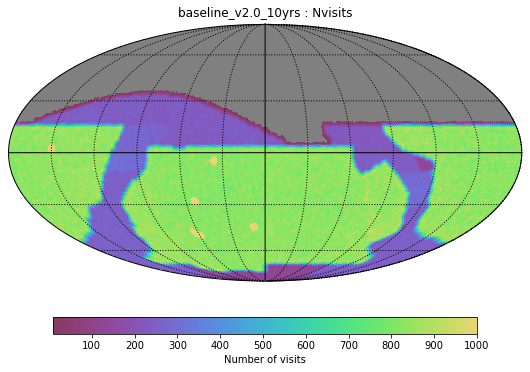

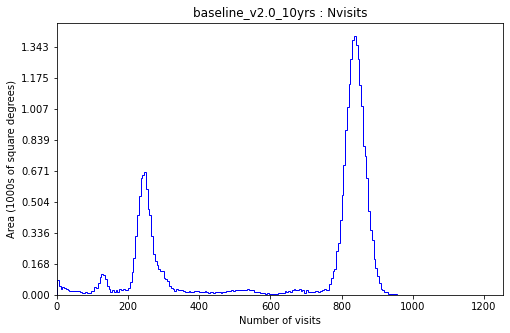

In [5]:
# Since the footprint is modified a bit, let's check it out
nvisits = maf.MetricBundle.load('baseline_v2_0_10yrs_Nvisits_HEAL.npz')
nvisits.setPlotDict({'colorMin': 10, 'colorMax': 1000, 'xlabel': 'Number of visits',
                    'figsize': (8, 5), 'xMin': 0, 'bins': np.arange(0, 1200, 5)})
nvisits.plot()

To help with understanding changes from baseline_nexp2_v1.7.1_10yrs or other previous simulations in the 1.x releases, we also added the `retro` family. 

In [6]:
runs.family_info('retro')

**retro** : The retro family provides two simulations to bridge the gap between previous sets of simulations and the updated baseline. One (retro_baseline) uses the current code base to re-run the previous baseline (i.e. this is baseline_nexp2_v1.7.1_10yrs, but run with rubin_sim) while the other (retrofoot) uses updated code settings but re-creates the baseline_nexp2_v1.7.1_10yrs footprint. These are primarily intended to help users understand potential changes in their metric results from the 1.x series of runs to the v2.0 runs, as well as the modification from sims_maf to rubin_sim.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
baseline_retrofoot_v2.0_10yrs,17510.183320,14959.569932,2086534.0,875.0,56.0,79.0,185.0,188.0,166.0,173.0,v1.x footprint but new code capabilities
retro_baseline_v2.0_10yrs,14611.263069,15095.535503,2048566.0,848.0,53.0,74.0,180.0,180.0,161.0,172.0,v1.x baseline with rubin_sim (without new code...


You can see some differences -- the v2.0 footprint requires slightly more survey time to cover an overall larger footprint on the sky, so the amount of area with much more than 825 visits per pointing drops. The median value of 'Number of visits per position on the sky' is still above 825 over an 18,000 sq deg area, but it's much closer to 825 than it used to be (so the tails of this distribution bring the amount of area with strictly > 825 visits per pointing down, compared to the v1.x footprint).

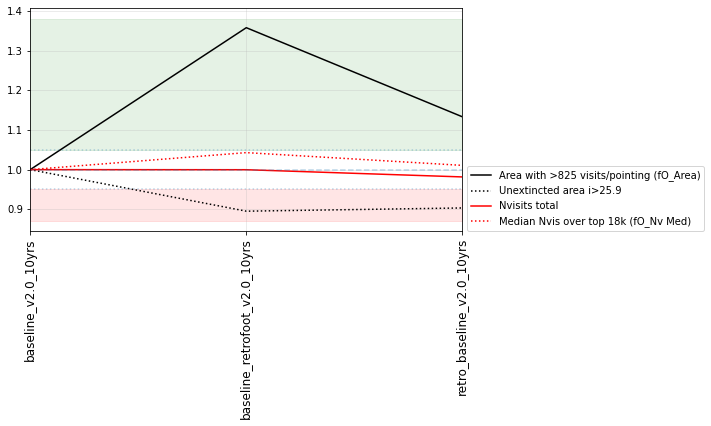

In [7]:
runs.plot_areaNvis(['baseline', 'retro'])

<a id='rolling'></a>

### Rolling cadence ###

The updated baseline includes a 2-region rolling cadence throughout the dust-free WFD. However, there are other options for rolling cadence, including no rolling cadence. These families look at some options.

In [8]:
rolling_fams = [r for r in family_list if 'roll' in r]
for r in rolling_fams:
    d = runs.family_info(r)
    display(d)

**rolling** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations extend upon and modify this rolling cadence in the dust-free WFD including using 3 regions instead of 2, and adding variable weight ("strength") to the level of rolling.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
rolling_ns2_rw0.5_v2.0_10yrs,12614.583488,16807.694539,2084510.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0,Rolling half-sky (2 regions) 50%
rolling_ns2_rw0.9_v2.0_10yrs,12893.228978,16711.175770,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0,Rolling half-sky (2 regions) 90%
rolling_ns3_rw0.5_v2.0_10yrs,12729.566717,16873.159443,2085499.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0,Rolling third-sky (3 regions) 50%
rolling_ns3_rw0.9_v2.0_10yrs,13255.803832,16568.495850,2090909.0,841.0,54.0,70.0,178.0,181.0,160.0,167.0,Rolling third-sky (3 regions) 90%


**rolling_bulge** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations add a rolling cadence in the WFD-level area of the galactic plane. The rolling in the bulge is implemented in 2-regions, with varying weights (or strengths).

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
rolling_bulge_ns2_rw0.5_v2.0_10yrs,12600.315496,16868.962975,2084413.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0,"Roll in the bulge with 2 regions, 50%"
rolling_bulge_ns2_rw0.8_v2.0_10yrs,12733.763185,16664.175326,2086550.0,838.0,54.0,70.0,178.0,180.0,161.0,166.0,"Roll in the bulge with 2 regions, 80%"
rolling_bulge_ns2_rw0.9_v2.0_10yrs,12940.229422,16706.140008,2087907.0,840.0,54.0,70.0,178.0,180.0,160.0,166.0,"Roll in the bulge with 2 regions, 90%"


**rolling_bulge_6** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulation add a 6-region rolling cadence to the galactic bulge WFD-level area in addition.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
rolling_bulge_6_v2.0_10yrs,12492.885909,16606.264064,2085745.0,838.0,53.0,69.0,177.0,180.0,160.0,166.0,Roll the bulge in 6 stripes (low-dust WFD in 2...


**rolling_six** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations modify this rolling cadence in the dust-free WFD to use 6 regions instead of 2, with variable weight ("strength") to the level of rolling.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
six_rolling_ns6_rw0.5_v2.0_10yrs,12342.652346,16665.014619,2084148.0,837.0,54.0,70.0,177.0,180.0,159.0,166.0,Rolling in one-sixth sky (6 regions) 50%
six_rolling_ns6_rw0.9_v2.0_10yrs,12735.441772,16336.011510,2089610.0,841.0,53.0,70.0,177.0,180.0,160.0,167.0,Rolling in one-sixth sky (6 regions) 90%


**rolling_early** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. In the baseline, rolling cadence starts at year 1.5 and ends at 8.5, so that each rolling "season" is an entire season length. This simulation modifies the timing, so that rolling starts at the end of year 1 and ends at year 9. The time available for rolling is longer, although may be split; the time available for all-sky surveying for astrometric purposes is maintained. Data releases may be potentially more uniform (TBD).

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
roll_early_v2.0_10yrs,12999.819271,16536.602692,2088889.0,840.0,54.0,70.0,178.0,180.0,160.0,167.0,Start rolling year 1


**rolling_all_sky** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulations adds a 2-region rolling cadence on all parts of the sky, including all parts of the galactic plane, the northern ecliptic spur, and the south celestial pole.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,12900.782621,16599.549715,2088105.0,839.0,54.0,69.0,178.0,180.0,160.0,166.0,Roll on all parts of the sky


**noroll** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulation removes the rolling cadence completely.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
noroll_v2.0_10yrs,12558.350813,17005.767839,2083375.0,837.0,54.0,70.0,177.0,180.0,160.0,166.0,v2.0 baseline with no rolling


How rolling cadence is implemented makes little difference to the overall area covered or number of visits per pointing. It will affect the cadence, however.

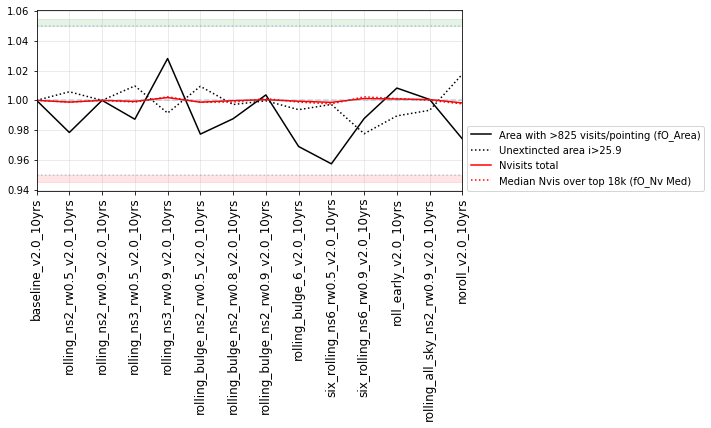

In [9]:
runs.plot_areaNvis(rolling_fams)

<a id='mini-surveys'></a>

### Mini-surveys ###

The familiar mini-surveys include the Northern Ecliptic Spur, covering the ecliptic north of the WFD survey, and the Galactic Plane, which now covers the majority of the dusty regions of the galactic plane. The South Celestial Pole is an additional mini-survey, however it already has very minimal coverage and uses a very small amount of survey time, thus we have not studied modifying its survey time in the same way we have for the NES and the GP.

In [10]:
k = 'vary_nes'
runs.family_info(k)

**vary_nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same. 

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
vary_nes_nesfrac0.01_v2.0_10yrs,17534.522836,16896.659665,2087392.0,869.0,55.0,72.0,184.0,187.0,167.0,172.0,NES at 1% WFD level
vary_nes_nesfrac0.05_v2.0_10yrs,17223.144893,16868.962975,2087572.0,865.0,55.0,71.0,183.0,186.0,166.0,172.0,NES at 5% WFD level
vary_nes_nesfrac0.10_v2.0_10yrs,16779.158555,16769.087031,2087761.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0,NES at 10% WFD level
vary_nes_nesfrac0.15_v2.0_10yrs,16146.331147,16760.694095,2087741.0,856.0,55.0,71.0,181.0,184.0,164.0,170.0,NES at 15% WFD level
vary_nes_nesfrac0.20_v2.0_10yrs,15380.056048,16815.248182,2087462.0,851.0,55.0,71.0,180.0,183.0,163.0,169.0,NES at 20% WFD level
vary_nes_nesfrac0.25_v2.0_10yrs,14228.545167,16691.032722,2087377.0,845.0,54.0,70.0,179.0,181.0,161.0,168.0,NES at 25% WFD level
vary_nes_nesfrac0.30_v2.0_10yrs,12893.228978,16711.175770,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0,NES at 30% WFD level
vary_nes_nesfrac0.35_v2.0_10yrs,11059.372363,16583.603136,2087488.0,832.0,53.0,69.0,176.0,178.0,159.0,165.0,NES at 35% WFD level
vary_nes_nesfrac0.40_v2.0_10yrs,9061.014194,16561.781501,2087857.0,825.0,53.0,69.0,174.0,177.0,157.0,164.0,NES at 40% WFD level
vary_nes_nesfrac0.45_v2.0_10yrs,7089.513421,16518.138231,2087796.0,817.0,52.0,69.0,173.0,175.0,156.0,162.0,NES at 45% WFD level


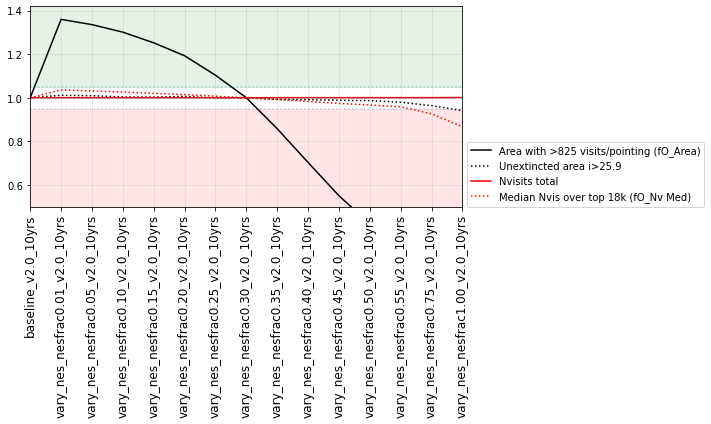

In [11]:
runs.plot_areaNvis(k)

In [12]:
k = 'vary_gp'
runs.family_info(k)

**vary_gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
vary_gp_gpfrac0.01_v2.0_10yrs,16736.354579,16818.605356,2088147.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0,Dusty plane at 1% WFD level
vary_gp_gpfrac0.05_v2.0_10yrs,16665.014619,16706.140008,2088534.0,861.0,55.0,71.0,182.0,185.0,164.0,171.0,Dusty plane at 5% WFD level
vary_gp_gpfrac0.10_v2.0_10yrs,16511.423882,16810.212420,2088477.0,859.0,55.0,71.0,182.0,185.0,164.0,170.0,Dusty plane at 10% WFD level
vary_gp_gpfrac0.15_v2.0_10yrs,15621.772618,16739.711754,2088838.0,853.0,54.0,71.0,181.0,183.0,163.0,169.0,Dusty plane at 15% WFD level
vary_gp_gpfrac0.20_v2.0_10yrs,14733.799942,16736.354579,2088077.0,847.0,54.0,70.0,179.0,182.0,162.0,168.0,Dusty plane at 20% WFD level
vary_gp_gpfrac0.25_v2.0_10yrs,13427.019736,16636.478635,2088389.0,841.0,54.0,70.0,178.0,181.0,161.0,167.0,Dusty plane at 25% WFD level
vary_gp_gpfrac0.30_v2.0_10yrs,11804.665120,16665.014619,2087314.0,834.0,54.0,69.0,176.0,179.0,160.0,166.0,Dusty plane at 30% WFD level
vary_gp_gpfrac0.35_v2.0_10yrs,9751.752864,16700.264952,2086873.0,827.0,53.0,69.0,174.0,177.0,158.0,165.0,Dusty plane at 35% WFD level
vary_gp_gpfrac0.40_v2.0_10yrs,7674.501092,16560.942207,2086160.0,820.0,53.0,70.0,173.0,176.0,156.0,163.0,Dusty plane at 40% WFD level
vary_gp_gpfrac0.45_v2.0_10yrs,5786.929684,16477.012843,2085954.0,812.0,52.0,70.0,172.0,174.0,155.0,161.0,Dusty plane at 45% WFD level


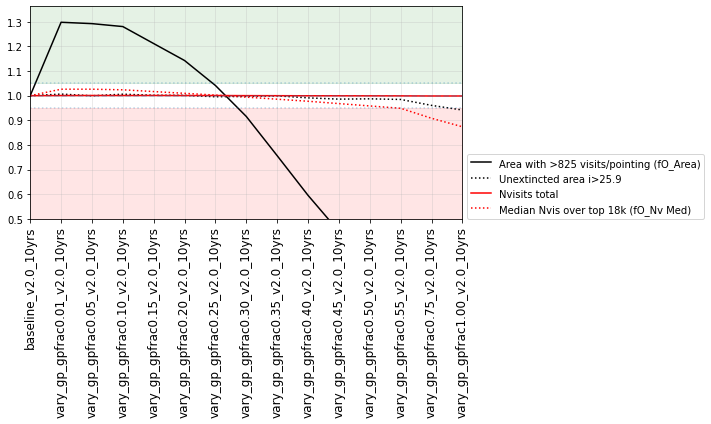

In [13]:
runs.plot_areaNvis(k)

<a id='filter'></a>

### Filter balance ###

The SCOC phase 1 recommendations found that the standard filter balance for the low-dust WFD region was generally considered appropriate, however, there were some questions as to whether more time spent in *u* and/or *g* bands would be helpful. The families here investigate different efforts at redirecting time towards these bluer bandpasses. 

In [14]:
k = 'bluer'
runs.family_info(k)

**bluer** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
bluer_indx0_v2.0_10yrs,12849.585708,16155.563377,2088051.0,839.0,53.0,94.0,170.0,171.0,152.0,166.0,"Filter ratio in WFD of {'u': 0.07, 'g': 0.12, ..."
bluer_indx1_v2.0_10yrs,12876.443105,16210.117464,2089107.0,839.0,61.0,86.0,170.0,171.0,152.0,167.0,"Filter ratio in WFD of {'u': 0.08, 'g': 0.11, ..."


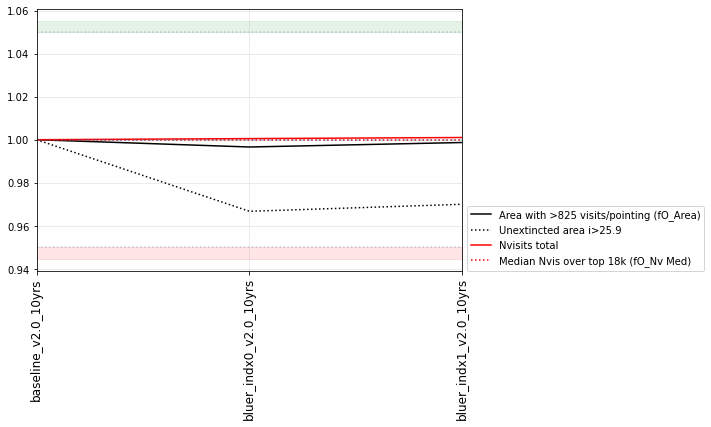

In [15]:
runs.plot_areaNvis(k)

In [16]:
k = 'long_u'
runs.family_info(k)

**long_u** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
long_u1_v2.0_10yrs,17197.966084,16420.780169,2021286.0,866.0,52.0,67.0,171.0,174.0,155.0,161.0,"u band visits 1x50s, number of u visits same a..."
long_u2_v2.0_10yrs,15840.828260,16687.675548,2040731.0,854.0,33.0,70.0,177.0,181.0,160.0,167.0,"u band visits 1x50s, fewer number of u visits"


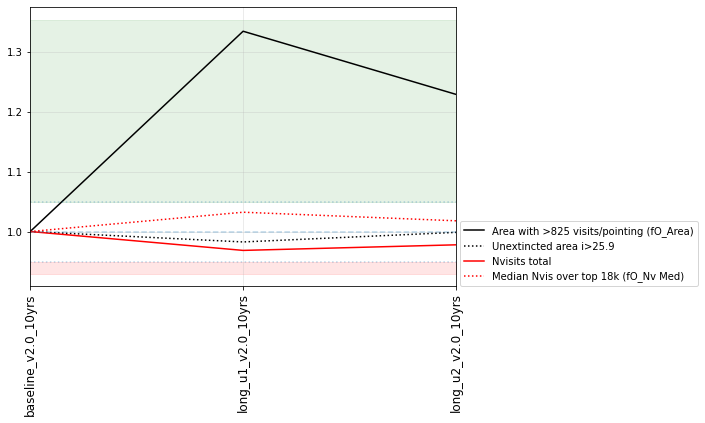

In [17]:
runs.plot_areaNvis(k)

<a id='ddf'></a>

### DDF ###

The deep-drilling fields currently receive about 1% of the total survey time per DDF location. There are five DDFs, so this accounts for 5% of the total survey time. Each DDF is a single pointing, with the exception of the Euclid South DDF which is a double-pointing (so the final depths in this DDF are a little shallower). 

This family investigates the effect of spending more or less time on the DDFs. 

We do anticipate improving and extending these simulations in v2.1. 

In [18]:
k = 'ddf'
runs.family_info(k)

**ddf** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
ddf_frac_ddf_per0.6_v2.0_10yrs,15656.183658,16786.712198,2087949.0,853.0,55.0,71.0,180.0,183.0,163.0,169.0,DDF fraction of visits reduced to 3% of total
ddf_frac_ddf_per1.6_v2.0_10yrs,5702.161026,16396.440653,2086426.0,811.0,52.0,67.0,171.0,174.0,155.0,161.0,DDF fraction of visits increased to 8%


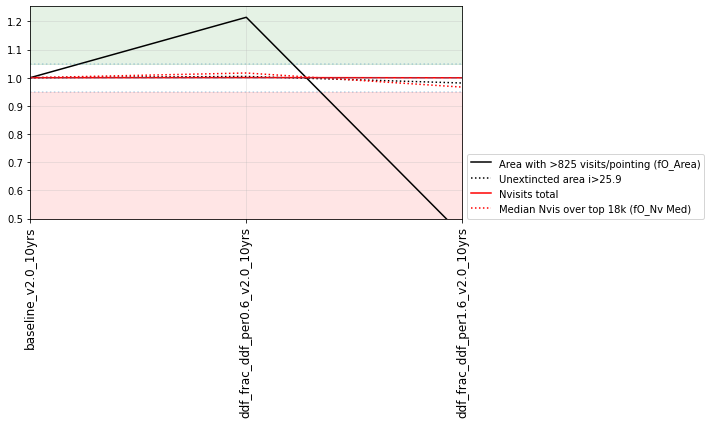

In [19]:
runs.plot_areaNvis(k)

<a id='micro-surveys'></a>

### Micro-surveys ###

There are many special observing proposals that can help support and extend the LSST's primary science drivers. Many of these were submitted in response to the 2018 Call for White Papers, and many of the micro-surveys requiring between 0.3-3% of the overall survey time were simulated as part of these v2.0 simulations. The SCOC are likely to delay decisions on micro-surveys beyond the Phase 2 recommendations, but these are useful guides to both preparing to answer community priorities and to ensure that the scheduler itself has all required capabilities.

In [20]:
k = 'microsurveys'
runs.family_info(k)

**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
roman_v2.0_10yrs,12283.062498,16671.728968,2083719.0,837.0,54.0,69.0,177.0,180.0,160.0,166.0,Microsurvey of the Roman bulge field
virgo_cluster_v2.0_10yrs,12161.364919,16685.996960,2087802.0,836.0,54.0,70.0,177.0,179.0,160.0,165.0,Add the virgo cluster to WFD footprint
too_rate50_v2.0_10yrs,11628.413454,16609.621239,2079989.0,834.0,53.0,69.0,177.0,179.0,159.0,164.0,"Follow up ToO alerts, 50 events per year"
too_rate10_v2.0_10yrs,12710.262963,16508.906001,2086250.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0,"Follow up ToO alerts, 10 events per year"
north_stripe_v2.0_10yrs,7379.069729,16472.816375,2089053.0,819.0,49.0,66.0,170.0,172.0,153.0,156.0,Add a north stripe to Dec +30
twilight_neo_nightpattern7v2.0_10yrs,3772.624935,16352.797383,2417826.0,803.0,51.0,67.0,191.0,194.0,168.0,159.0,Twilight neo observations 2 night on 4 off
twilight_neo_nightpattern6v2.0_10yrs,1927.857503,16195.849472,2524598.0,791.0,51.0,66.0,196.0,200.0,171.0,157.0,Twilight neo observations 3 night on 4 off
twilight_neo_nightpattern1v2.0_10yrs,114.983229,15352.359358,3079761.0,730.0,47.0,61.0,273.0,271.0,247.0,144.0,Twilight neo observations every night
twilight_neo_nightpattern2v2.0_10yrs,1309.298087,16055.687433,2586114.0,785.0,50.0,65.0,202.0,210.0,176.0,156.0,Twilight neo observations every other night
twilight_neo_nightpattern4v2.0_10yrs,5852.394588,16502.191652,2329938.0,813.0,52.0,67.0,189.0,192.0,167.0,161.0,Twilight neo observations 1 night on 3 off


Especially when considering micro-surveys, it is worthwhile to remember that sometimes visits can be extremely SHORT. 

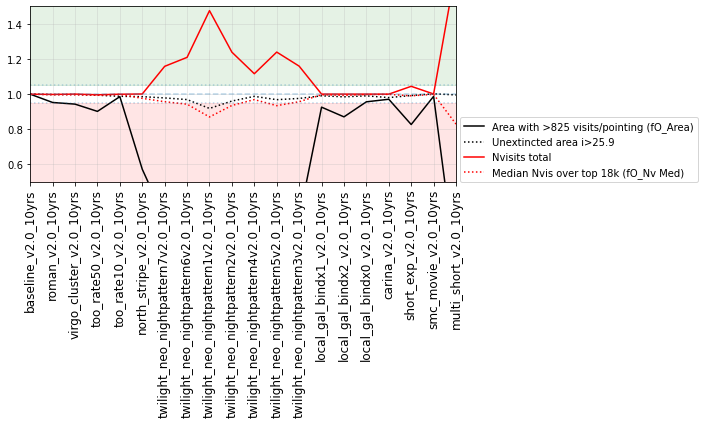

In [21]:
runs.plot_areaNvis(k)

### Other simulations ###

In [22]:
k = 'vary_expt'
runs.family_info(k)

**vary_expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. This simulation attempts to make the individual image depth more consistent by varying the exposure time depending on conditions. Each visit could have an on-sky exposure time of between 20s to 100s.

Most likely comparison run: baseline_v2.0_10yrs


,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
vary_expt_v2.0_10yrs,18090.974523,16948.695871,1858421.0,934.0,49.0,62.0,157.0,160.0,140.0,147.0,Vary the exposure times between 20 and 100s


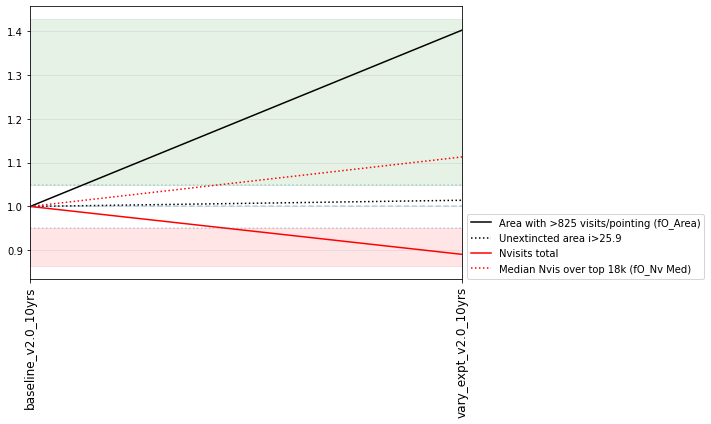

In [23]:
runs.plot_areaNvis(k)